In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import rebound
import reboundx
import numpy as np
import datetime

#...Integrate WITHOUT operator:

def simulation(two_planet=False):
    sim = rebound.Simulation()
    #...add HD 147018 parameters:
    sim.add(m=0.927)
    sim.add(a=0.238900,e=0.468600,m=0.0,omega=np.radians(66.0054),inc=np.radians(35.614629),Omega=0.,M=np.radians(0.698350))
    if two_planet == True:
        sim.add(a=1.9230,e=0.133000,m=0.0062886114,omega=np.radians(136.865),inc=np.radians(3.3853710),Omega=np.radians(180.0),M=np.radians(-293.214))
    sim.move_to_com() # Moves to the center of momentum frame
    #sim.move_to_hel()
    return sim

def run_simulation(sim,times,tides=False):
    ps = sim.particles
    if tides == True:
        rebx = reboundx.Extras(sim)
        mod = rebx.load_operator("modify_orbits_direct2")
        rebx.add_operator(mod)
        ps[1].params["tau_e"] = 5e4
    Nout = len(times)    
    e1 = np.zeros(Nout)
    sim.integrator='ias15'
    sim.ri_ias15.epsilon=0 #...to be used with fixed timestep in IAS
    for i,time in enumerate(times):
        sim.integrate(time)
        e1[i] = ps[1].e
    return e1

CPU times: user 2.91 s, sys: 0 ns, total: 2.91 s
Wall time: 2.9 s


/storage/home/l/len56/rebound/rebound/simulation.py:653: RuntimeWarning: At least 10 predictor corrector loops in IAS15 did not converge. This is typically an indication of the timestep being too large.
  warnings.warn(msg[1:], RuntimeWarning)


CPU times: user 15.3 s, sys: 0 ns, total: 15.3 s
Wall time: 15.3 s
CPU times: user 4.73 s, sys: 0 ns, total: 4.73 s
Wall time: 4.73 s


/storage/home/l/len56/rebound/rebound/simulation.py:653: RuntimeWarning: At least 10 predictor corrector loops in IAS15 did not converge. This is typically an indication of the timestep being too large.
  warnings.warn(msg[1:], RuntimeWarning)


CPU times: user 22.2 s, sys: 0 ns, total: 22.2 s
Wall time: 22.2 s


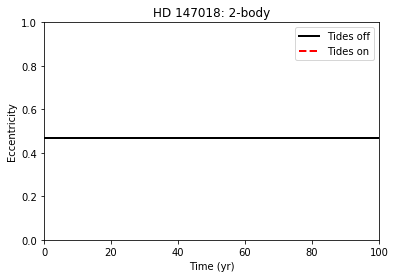

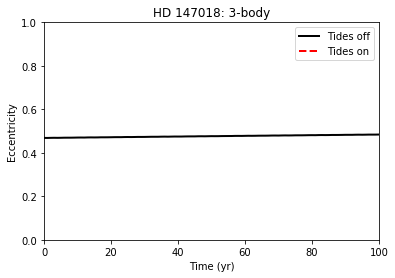

In [2]:
years = 2.0*np.pi
times = np.linspace(0,1e2,101)*years

sim1 = simulation(two_planet=False)
sim2 = simulation(two_planet=True)

%time e1tF = run_simulation(sim1,times,tides=False)
%time e1tT = run_simulation(sim1,times,tides=True)
%time e2tF = run_simulation(sim2,times,tides=False)
%time e2tT = run_simulation(sim2,times,tides=True)


fig = plt.figure()
plt.plot(times/years,e1tF,label='Tides off',color='black',linewidth=2)
plt.plot(times/years,e1tT,label='Tides on',linestyle='--',color='red',linewidth=2)
plt.xlabel("Time (yr)" )
plt.ylabel("Eccentricity")
plt.ylim(0,1)
plt.title('HD 147018: '+str(sim1.N)+'-body')
plt.legend()
#plt.tight_layout()
plt.autoscale(enable=True, axis='x', tight=True)
#plt.savefig(dir_name+'plots/'+savetag+'.pdf',bbox_inches='tight')

fig = plt.figure()
plt.plot(times/years,e2tF,label='Tides off',color='black',linewidth=2)
plt.plot(times/years,e2tT,label='Tides on',linestyle='--',color='red',linewidth=2)
plt.xlabel("Time (yr)" )
plt.ylabel("Eccentricity")
plt.ylim(0,1)
plt.title('HD 147018: '+str(sim2.N)+'-body')
plt.legend()
#plt.tight_layout()
plt.autoscale(enable=True, axis='x', tight=True)
#plt.savefig(dir_name+'plots/'+savetag+'.pdf',bbox_inches='tight')





In [ ]:
now = datetime.datetime.now().isoformat().replace('-','').replace(':','').replace('.','')[:-6]
dir_name = '/storage/home/len56/work/warm_jupiters/'
savetag = 'hd147018bc_tm.'+now
header = "Columns: time (years), eccentricity (tides off), eccentricity (tides on)"
np.savetxt(dir_name+'data/'+savetag+'.txt',np.c_[times/years,e1_tm_f,e1_tm_t],header=header)